In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
import statsmodels as sm

In [3]:
temp_missing = pd.read_csv('machine_temp_failure_missing.csv', parse_dates = True)
temp_org = pd.read_csv('machine_temp_failure_original.csv')
temp_missing.describe()

,value
count,21410.000000
mean,85.968188
std,13.553070
min,2.084721
25%,83.082867
50%,89.251290
75%,93.910748
max,108.510543


In [4]:
temp_missing.rename(columns = {'value':'temperature'}, inplace = True)
temp_org.rename(columns = {'value': 'temperature'}, inplace = True)
temp_missing

,timestamp,temperature
0,02-12-2013 21:15,73.967322
1,02-12-2013 21:20,74.935882
2,02-12-2013 21:25,76.124162
3,02-12-2013 21:30,78.140707
4,02-12-2013 21:35,79.329836
...,...,...
22690,19-02-2014 15:05,98.185415
22691,19-02-2014 15:10,97.804168
22692,19-02-2014 15:15,97.135468
22693,19-02-2014 15:20,98.056852


In [5]:
temp_missing.isnull().sum() #checking for missing values

timestamp         0
temperature    1285
dtype: int64

In [6]:
temp_missing['temp_diff'] = temp_missing['temperature'].diff()
temp_missing

,timestamp,temperature,temp_diff
0,02-12-2013 21:15,73.967322,NaN
1,02-12-2013 21:20,74.935882,0.968560
2,02-12-2013 21:25,76.124162,1.188280
3,02-12-2013 21:30,78.140707,2.016546
4,02-12-2013 21:35,79.329836,1.189128
...,...,...,...
22690,19-02-2014 15:05,98.185415,NaN
22691,19-02-2014 15:10,97.804168,-0.381246
22692,19-02-2014 15:15,97.135468,-0.668700
22693,19-02-2014 15:20,98.056852,0.921384


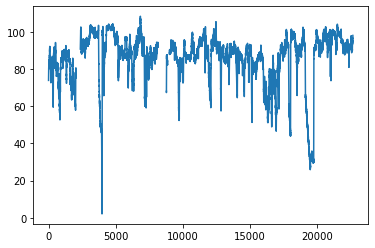

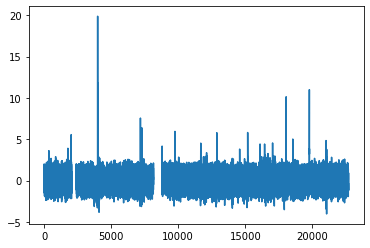

In [7]:
plt.plot(temp_missing['temperature'])
plt.show()
plt.plot(temp_missing['temp_diff'])
plt.show()

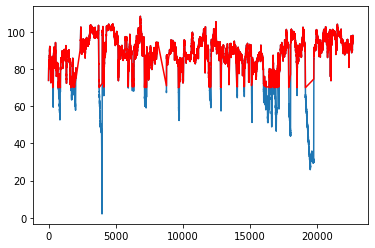

In [8]:
red_temps = temp_missing[temp_missing['temperature'] > 70]
plt.plot(temp_missing['temperature'])
plt.plot(red_temps['temperature'], color='red')
plt.show()

In [9]:
def read_dataset(folder, file, date_col=None):
    df = pd.read_csv(folder / file, 
                     index_col=date_col, 
                     parse_dates=[date_col])
    return df

In [10]:
def plot_dfs(df1, df2, col, title=None, xlabel=None, ylabel=None): 
    df_missing = df2.rename(columns={col: 'missing'})
    
    columns = df_missing.loc[:, 'missing':].columns.tolist()
    subplots_size = len(columns)
    
    # subplots_size = df2.shape[1]
    fig, ax = plt.subplots(subplots_size+1, 1, sharex=True)
    plt.subplots_adjust(hspace=0.25)
    fig.suptitle = title 
    
    df1[col].plot(ax=ax[0], figsize=(10, 16))
    ax[0].set_title('Original Dataset')
    ax[0].set_xlabel(xlabel)
    ax[0].set_ylabel(ylabel)    
    
    for i, colname in enumerate(columns):
        df_missing[colname].plot(ax=ax[i+1])
        ax[i+1].set_title(colname)

    plt.show()

In [11]:
def rmse_score(df1, df2, col=None):
    df_missing = df2.rename(columns={col: 'missing'})
    columns = df_missing.loc[:, 'missing':].columns.tolist()
    scores = []
    for comp_col in columns[1:]:
        rmse = np.sqrt(np.mean((df1[col] - df_missing[comp_col])**2))
        scores.append(rmse)
        print(f'RMSE for {comp_col}: {rmse}')
    return scores

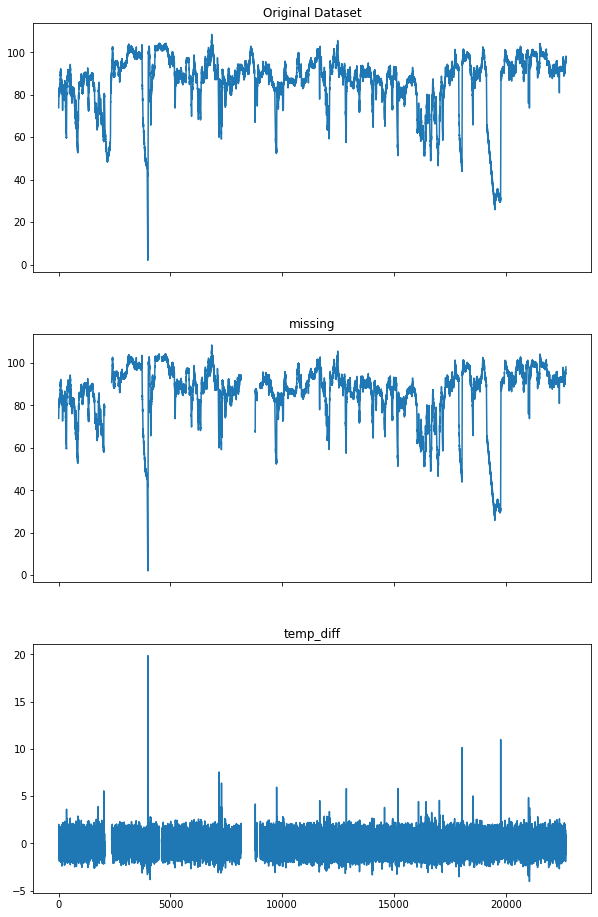

In [12]:
plot_dfs(temp_org,temp_missing , 'temperature')

In [13]:
temp_missing['ffill'] = temp_missing['temperature'].fillna(method='ffill')
temp_missing['bfill'] = temp_missing['temperature'].fillna(method='bfill')
temp_missing['mean'] = temp_missing['temperature'].fillna(temp_missing['temperature'].mean())

In [14]:
rmse_score(temp_org, 
                    temp_missing, 
                    'temperature')

RMSE for temp_diff: 87.02576617592614
RMSE for ffill: 2.493995652427445
RMSE for bfill: 5.8731285674558125
RMSE for mean: 3.96153649622671


[87.02576617592614, 2.493995652427445, 5.8731285674558125, 3.96153649622671]

In [24]:
temp_missing2 = temp_missing[['timestamp','ffill']]
temp_missing2

,timestamp,ffill
0,2013-02-12 21:15:00,73.967322
1,2013-02-12 21:20:00,74.935882
2,2013-02-12 21:25:00,76.124162
3,2013-02-12 21:30:00,78.140707
4,2013-02-12 21:35:00,79.329836
...,...,...
22690,2014-02-19 15:05:00,98.185415
22691,2014-02-19 15:10:00,97.804168
22692,2014-02-19 15:15:00,97.135468
22693,2014-02-19 15:20:00,98.056852


In [27]:
temp_missing['timestamp'] = pd.to_datetime(temp_missing['timestamp'])
temp_org['timestamp'] = pd.to_datetime(temp_org['timestamp'])
temp_down = temp_missing2.resample('60min', on = 'timestamp').mean()
temp_down2 = temp_org.resample('60min',on = 'timestamp').mean()
temp_down

,ffill
timestamp,
2013-02-12 21:00:00,78.011596
2013-02-12 22:00:00,80.598012
2013-02-12 23:00:00,81.625018
2013-02-13 00:00:00,NaN
2013-02-13 01:00:00,NaN
...,...
2014-12-02 19:00:00,97.351702
2014-12-02 20:00:00,94.759885
2014-12-02 21:00:00,98.165799


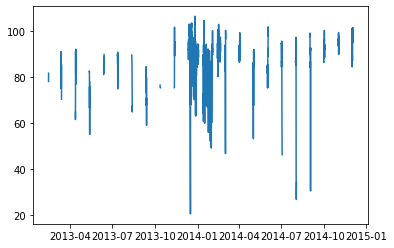

In [72]:
plt.plot(temp_down['ffill'])

wtf

HEY I DONT GET WHY IM GETTING NULL VALUES AFTER RESAMPLING THIS DATA... IVE TRIED A FEW THINGS TO GO AROUND IT BUT IT DOESN'T SEEM TO WORK.